In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/dvidyasagar/Coding/ML/coding ninjas/data/homeprices.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [3]:
def generate_data(size, noise_level):
    x = np.random.randn(size) * 15
    noise = np.random.randn(size) * noise_level
    y = 7 * x + noise + 5
    return x,y

In [16]:
X, Y = generate_data(10000, 23)

In [17]:
def plotData(X, Y, color='green', title='Data'):
    plt.scatter(X, Y, color = color)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)

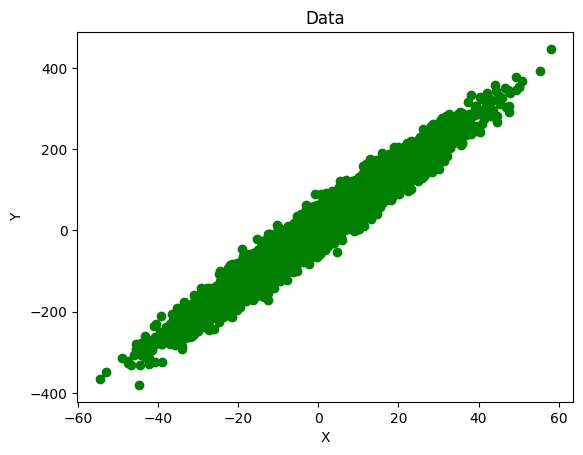

In [18]:
plotData(X,Y)

In [88]:
def hypothesis(X, theta):
    return theta[0] + theta[1]*X

def error(X, Y, theta):
    m = Y.shape[0]
    Y_predict = hypothesis(X,theta)
    sqare_gap = (Y_predict - Y)**2
    sum_error = np.sum(sqare_gap)
    return sum_error / (2*m)

def gradient(X, Y, theta):
    Y_predict = hypothesis(X, theta)
    m = X.shape[0]
    grad0 = 0
    grad1 = 0
    for i in range(m):
        grad1 += (hypothesis(X[i],theta) - Y[i])*X[i]
        grad0 += (hypothesis(X[i], theta) - Y[i])
    return grad0/m, grad1/m

def normalize(X):
    return (X - X.mean()) / X.std()

def train(X,Y):
    theta = [0.0, 0.0]
    looper = 5000
    lr = 0.1
    for i in range(looper):
        grad = gradient(X, Y, theta)
        # print(grad)
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
    return theta

In [89]:
from sklearn.model_selection import train_test_split
X = normalize(X)

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [91]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(7500,) (2500,) (7500,) (2500,)


In [92]:
theta = train(X_train, Y_train)
theta

[5.458130723927642, 105.0287378072886]

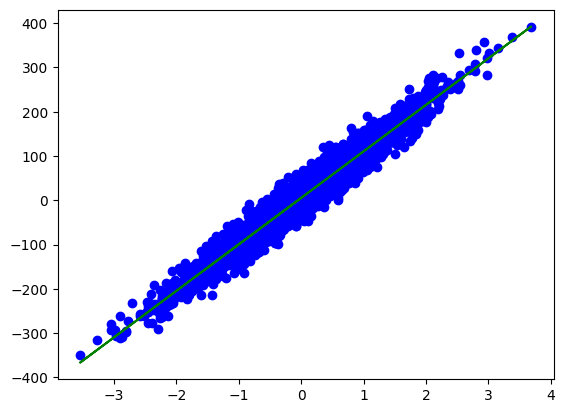

In [94]:
plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_test, hypothesis(X_test, theta), color = 'green')
plt.show()